<a href="https://colab.research.google.com/github/AbhayMudgal/PD_prediction/blob/main/Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras as K
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv("Train_set.csv")
test = pd.read_csv("Test_set.csv")
data.columns

Index(['ID', 'loan_amnt', 'loan_term', 'interest_rate', 'loan_grade',
       'loan_subgrade', 'job_experience', 'home_ownership', 'annual_income',
       'income_verification_status', 'loan_purpose', 'state_code',
       'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance',
       'total_acc', 'interest_receive', 'application_type', 'last_week_pay',
       'total_current_balance', 'total_revolving_limit', 'default'],
      dtype='object')

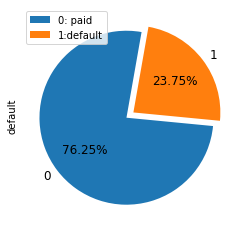

In [ ]:
data.default.value_counts().plot(kind = 'pie', autopct='%1.2f%%', subplots = True, explode = (0.05, 0.05), startangle = 80, legend = True, fontsize = 12)
plt.legend(['0: paid', '1:default'])
plt.show()

In [ ]:
#General Functions. Input string containing column name.
def stats(x):
    # basic statistics about a column.
    print(f"Variable: {x}")
    print(f"Type of variable: {data[x].dtype}")
    print(f"Total observations: {data[x].shape[0]}")
    detect_null_val = data[x].isnull().values.any()
    if detect_null_val:
        print(f"Missing values: {data[x].isnull().sum()} ({(data[x].isnull().sum() / data[x].isnull().shape[0] *100).round(2)}%)")
    else:
        print(f"Missing values? {data[x].isnull().values.any()}")
    print(f"Unique values: {data[x].nunique()}")
    if data[x].dtype != "O":
        print(f"Min: {int(data[x].min())}")
        print(f"25%: {int(data[x].quantile(q=[.25]).iloc[-1])}")
        print(f"Median: {int(data[x].median())}")
        print(f"75%: {int(data[x].quantile(q=[.75]).iloc[-1])}")
        print(f"Max: {int(data[x].max())}")
        print(f"Mean: {data[x].mean()}")
        print(f"Std dev: {data[x].std()}")
        print(f"Variance: {data[x].var()}")
        print(f"Skewness: {scipy.stats.skew(data[x])}")
        print(f"Kurtosis: {scipy.stats.kurtosis(data[x])}")
        print("")
        
        # Percentiles 1%, 5%, 95% and 99%print("Percentiles 1%, 5%, 95%, 99%")
        display(data[x].quantile(q=[.01, .05, .95, .99]))
        print("")
    else:
        print(f"List of unique values: {data[x].unique()}")

def segregated_counts(x):
  #plots a bar graph of the column against the unique values of default.
  zero = data[data.default == 0].loc[:, x]
  one = data[data.default == 1].loc[:, x]

  a = np.array(zero)
  b = np.array(one)

  zero.value_counts().plot(kind = 'pie', autopct='%1.2f%%', subplots = True, explode = (0.05, 0.05), startangle = 80, legend = True, fontsize = 12)
  plt.legend(['3', '5'])
  plt.title('Non-Defaults', loc = 'right')  
  plt.show()
  
  one.value_counts().plot(kind = 'pie', autopct='%1.2f%%', subplots = True, explode = (0.05, 0.05), startangle = 80, legend = True, fontsize = 12)
  plt.legend(['3', '5'])
  plt.title('Defaults', loc = 'right')  
  plt.show()

  np.warnings.filterwarnings('ignore')

  plt.hist(a, bins = 40, label = 'Non Default', align = 'left')
  plt.hist(b, bins = 40, align = 'right', label = "Default")

  plt.legend(loc = 'upper right')
  plt.title(x, loc = 'right')
  plt.xlabel('relative frequency')
  plt.ylabel('absolute frequency')
  plt.show()

def boxhist(x):
  # plots the boxplot + histogram of the data column
  column = data[x]

  mean = np.array(column).mean()
  median = np.median(column)

  f, (box, hist) = plt.subplots(2, sharex = True, gridspec_kw={"height_ratios": (0.5, 2)})

  sns.boxplot(column, ax = box)
  box.axvline(mean, color = 'r', linestyle = "--")
  box.axvline(median, color = 'g', linestyle = '-')

  sns.histplot(column, ax = hist)
  hist.axvline(mean, color = 'r', linestyle = "--")
  hist.axvline(median, color = 'g', linestyle = '-')

  plt.title(x, loc = 'right')
  plt.legend({'Mean':mean, 'Median': median})
  plt.xlabel("")
  plt.show()

def hist(x):
  #plots the histogram of the data column
  plt.hist(data[x], bins = 40)
  plt.title(x, loc = 'right')
  plt.xlabel("Relative Frequency")
  plt.ylable("Absolute Frequency")
  plt.show()

def pie(x):
  #plots a pie chart of the distribution of column values
  data[x].value_counts(drop_na = False).plot(kind = 'pie', autopct='%1.1f%', startangle = 0, legend = True)

def bar(x):
  #plots a vertical bar graph of the data
  ax = data[x].value_counts().plot(kind = 'bar', color = sns.color_palette('rocket', table = False))
  for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
  
  plt.xlabel(x, fontsize = 10)
  plt.xticks(rotation = 0, horizontalalignment = 'center')
  plt.ylabel("Absolute Values", fontsize = 10)
  plt.title(x, loc = 'right')
  plt.show()

def pivot_mean(a, b, c):
  #
  type_pivot_mean = data.pivot_table(cloumns = a, index = b, values = c, aggfunc = np.mean)
  display(type_pivot_mean)

  type_pivot_mean.sort_values(by = [b], ascending = True).plot(kind='bar', title = (b))

def pivot_sum(a, b, c):
  #
  type_pivot_sum = data.pivot_table(columns = a, index = b, values=c, aggfunc = np.sum)
  display(type_pivot_sum)

  type_pivot_sum.sort_values(by = [b], ascending = True).plot(kind='bar', title = (b))

def scatter(x, y):
  #plots a scatter plot of the data
  targets = data.default.unique()
  for target in targets:
    a = data[data.default == target][x]
    b = data[data.default == target][y]
    plt.scatter(a, b, label = f"Default: {target}", marker = '*')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()


In [ ]:
print(data.dtypes.value_counts())

float64    11
object      7
int64       5
dtype: int64


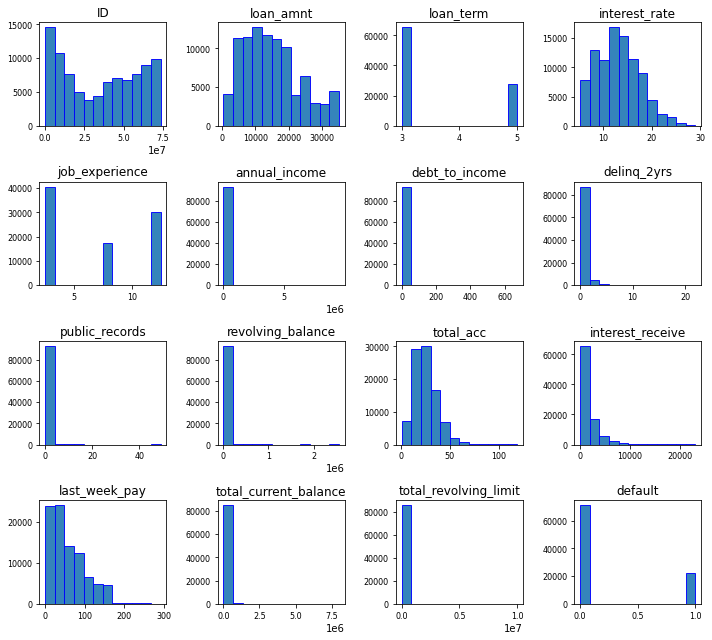

In [ ]:
data.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

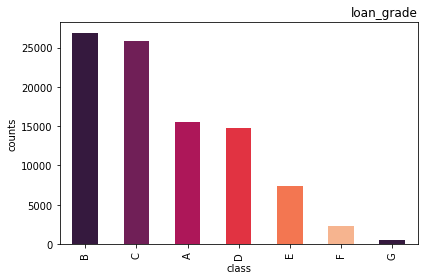

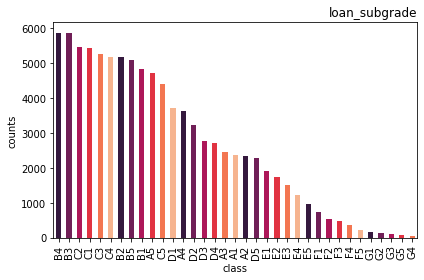

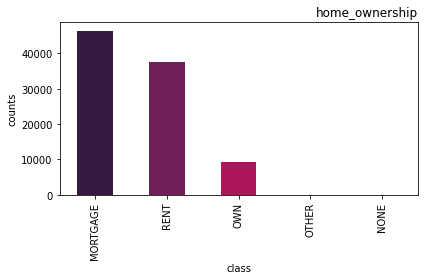

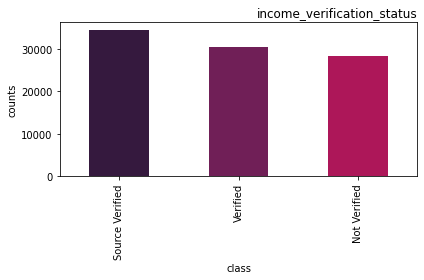

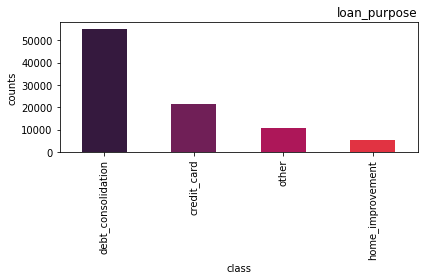

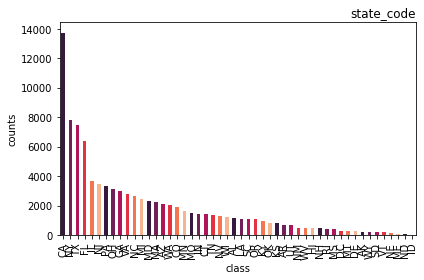

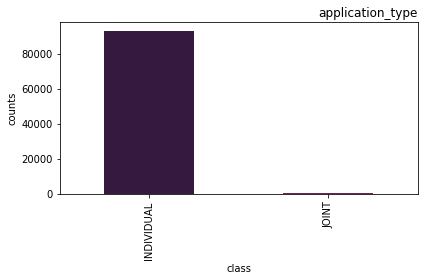

In [ ]:
for col in data.select_dtypes(include = ['object']).columns:
  data[col].value_counts().plot(kind = 'bar', color = sns.color_palette("rocket"))
  plt.xlabel('class')
  plt.xticks(rotation=90, horizontalalignment="center")
  plt.ylabel("counts")
  plt.title(col, loc = "right")
  plt.tight_layout()
  plt.show()

In [ ]:
le = LabelEncoder()
encode = ["loan_grade", 'loan_subgrade', 'home_ownership', 'loan_purpose', 'income_verification_status', 'application_type']

for col in encode:
  le.fit(data[col])
  data[col] = le.transform(data[col])
  test[col] = le.transform(test[col])

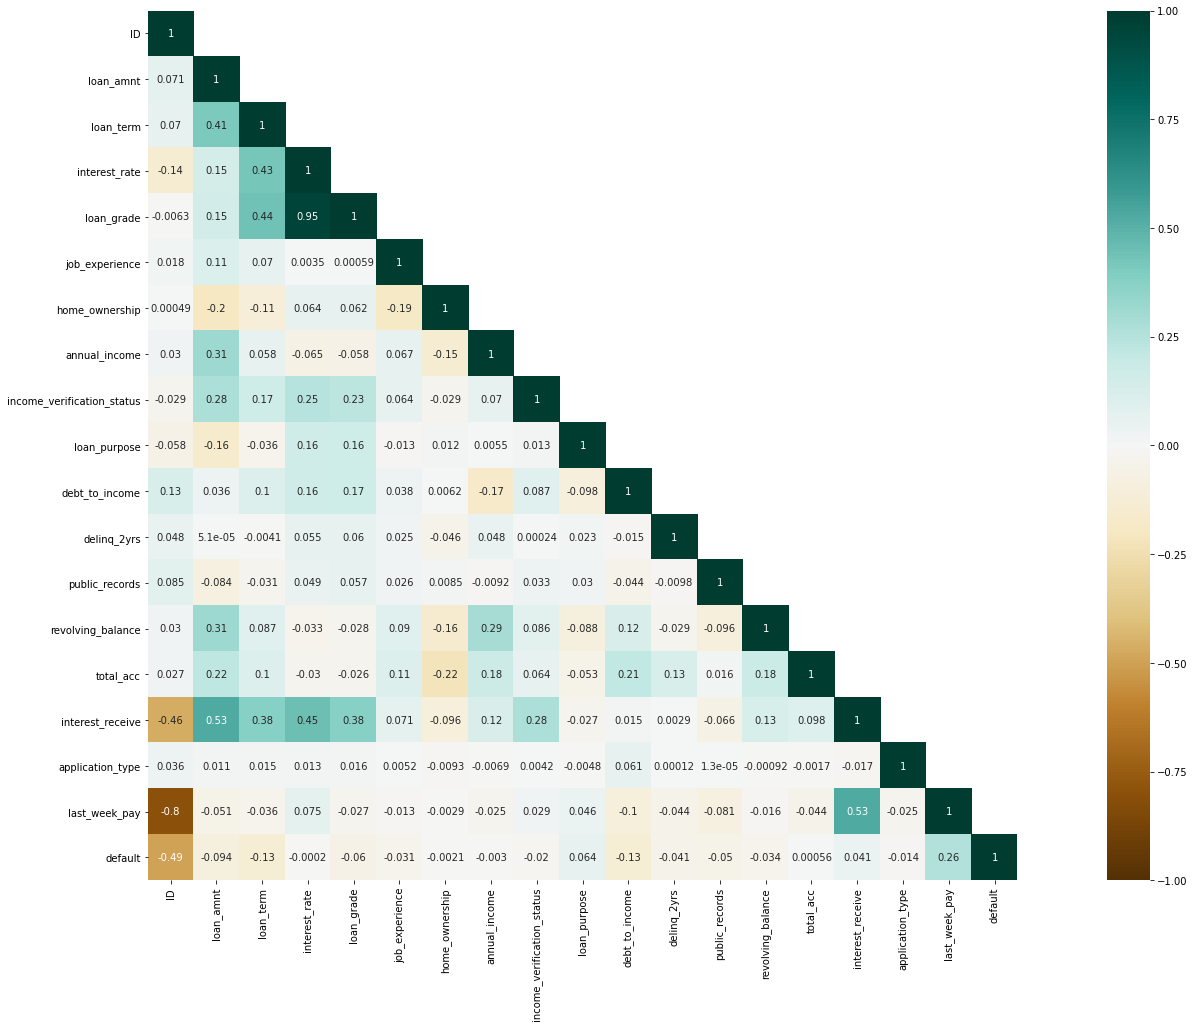

In [ ]:
mask = np.triu(data.corr(), 1)
plt.figure(figsize=(32, 16))
sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

In [ ]:
print("Train: \n", data.isna().sum(), "\n\n")
print("Test: \n", test.isna().sum())

Train: 
 ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
default                          0
dtype: int64 


Test: 
 ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
job_experience                2089
home_ownership                   0
annual_income         

In [ ]:
#We see a strong correlation between total_revolving_limit and revolving_balance.
#As such it would be a good approximation to drop the revolving limit column
#which has a large number of missing values. We also drop the weekly coorelated total
#current balance. We drop loan subgrade too.
data.drop(['total_revolving_limit', 'total_current_balance', 'loan_sub_grade'], axis = 1, inplace = True)
test.drop(['total_revolving_limit', 'total_current_balance', 'loan_sub_grade'], axis = 1, inplace = True)


In [ ]:
def transform(a, b):
  # min max transform for a column in test and train sets
  mi = min(a)
  ma = max(a)

  for i in range(len(a)):
    a.iloc[i] = (a.iloc[i] - mi)/(ma - mi)

  for i in range(len(b)):
    b.iloc[i] = (b.iloc[i] - mi)/(ma - mi)

  return a, b;
  
to_transform = ["loan_amnt", 'interest_rate', 'annual_income', 'revolving_balance', 'total_acc', 'interest_receive', 'last_week_pay']

for col in to_transform:
  data[col], test[col] = transform(data[col], test[col])


In [ ]:
data.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,default
0,72199369,0.246377,3,0.162653,1,2.5,3,0.008822,0,1,NC,26.68,0.0,0.0,0.015433,0.161017,0.002572,0,4.0,0
1,14257956,0.507246,3,0.351922,2,2.5,3,0.006611,2,1,SC,31.67,0.0,1.0,0.003820,0.194915,0.144494,0,95.0,0
2,66216451,0.449275,3,0.081960,0,2.5,0,0.015665,1,1,TX,19.70,2.0,0.0,0.005327,0.220339,0.011941,0,13.0,0
3,46974169,0.710145,3,0.366286,2,NaN,0,0.006169,2,1,MO,37.39,0.0,0.0,0.013676,0.288136,0.047760,0,17.0,0
4,46725961,0.478261,3,0.045205,0,12.5,0,0.007454,1,0,TX,8.92,0.0,0.0,0.009369,0.211864,0.031300,0,39.0,0


In [ ]:
data['total_current_balance'].fillna(110000, inplace = True)
test['total_current_balance'].fillna(110000, inplace = True)
data['last_week_pay'].fillna(48, inplace = True)
test['last_week_pay'].fillna(48, inplace = True)
data['total_revolving_limit'].fillna(32000, inplace = True)
test['total_revolving_limit'].fillna(32000, inplace = True)
data['job_experience'].fillna(method = 'ffill', inplace = True)
test['job_experience'].fillna(method = 'ffill', inplace = True)

In [ ]:
def categorical_transform(a, array):
  sub_array = to_categorical(a)
  if len(array) == 0:
    array = sub_array
  else: 
    array = np.append(array, sub_array, axis = 1)
  return array

categorical_list = ['loan_term', 'loan_grade', 'application_type' 'loan_subgrade', 'job_experience', 'home_ownership', 'loan_purpose', 'income_verification_status']

data_train = []
data_test = []
for item in categorical_list:
  data_train = categorical_transform(data[item], data_train)
  data_test = categorical_transform(test[item], data_test)
  data.drop([item], axis = 1, inplace = True)
  test.drop([item], axis = 1, inplace = True)

data_train = np.array(data_train)
data_test = np.array(data_test)

KeyError: ignored

In [ ]:
data.head(15)

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,default
0,0.246377,3,0.162653,1,6,2.5,3,0.008822,0,1,26.68,0.0,0.0,0.015433,0.161017,0.002572,0.013746,0.011937,0.008410,0
1,0.507246,3,0.351922,2,10,2.5,3,0.006611,2,1,31.67,0.0,1.0,0.003820,0.194915,0.144494,0.326460,0.023179,0.001350,0
2,0.449275,3,0.081960,0,3,2.5,0,0.015665,1,1,19.70,2.0,0.0,0.005327,0.220339,0.011941,0.044674,0.022565,0.001930,0
3,0.710145,3,0.366286,2,13,2.5,0,0.006169,2,1,37.39,0.0,0.0,0.013676,0.288136,0.047760,0.058419,0.022901,0.005540,0
4,0.478261,3,0.045205,0,1,12.5,0,0.007454,1,0,8.92,0.0,0.0,0.009369,0.211864,0.031300,0.134021,0.002999,0.008130,0
5,0.275362,3,0.311365,2,11,2.5,3,0.005769,0,1,16.16,0.0,1.0,0.002594,0.398305,0.025483,0.089347,0.003007,0.002517,0
6,0.420290,3,0.245881,1,6,12.5,4,0.010401,0,1,10.51,0.0,1.0,0.005502,0.110169,0.044043,0.120275,0.001815,0.001520,1
7,0.275362,3,0.049430,0,1,12.5,0,0.011349,0,0,10.84,1.0,0.0,0.004818,0.211864,0.031446,0.254296,0.026344,0.001860,0
8,0.333333,3,0.239544,1,8,2.5,4,0.004611,2,0,8.21,0.0,0.0,0.004120,0.093220,0.037940,0.134021,0.001319,0.002200,0
9,0.188406,3,0.302915,1,8,2.5,0,0.005453,0,1,18.84,0.0,0.0,0.004728,0.161017,0.051216,0.329897,0.018225,0.001680,0


In [ ]:
print(len(data_train), len(data_test))

0 0


In [ ]:
y = data['default']
data.drop(['default', 'loan_subgrade'], axis = 1, inplace = True)
test.drop(['loan_subgrade'], axis = 1, inplace = True)

In [ ]:
print(data.shape, test.shape)

(93172, 18) (39933, 18)


In [ ]:
X = data.to_numpy()
Y = y.to_numpy()
X_test = test.to_numpy()

In [ ]:
X = np.append(X, sub, axis = 1)
X_test = np.append(X_test, sub2, axis = 1)

In [ ]:
print(X.shape, X_test.shape)

(93172, 53) (39933, 53)


In [ ]:
model = K.Sequential([
      K.layers.Dense(53, input_shape = (53,), activation='relu'),
      K.layers.Dense(64,  activation='relu'),
      K.layers.Dense(16, activation='relu'),
      K.layers.Dense(1, activation='sigmoid')                 
])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 53)                2862      
_________________________________________________________________
dense_31 (Dense)             (None, 64)                3456      
_________________________________________________________________
dense_32 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 17        
Total params: 7,375
Trainable params: 7,375
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = K.optimizers.SGD(learning_rate = 0.1)

In [ ]:
model.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['accuracy'])
history = model.fit(X, y, epochs = 25, validation_split = 0.15)

2475/2475 [==============================] - 3s 1ms/step - loss: 0.2386 - accuracy: 0.7614 - val_loss: 0.2309 - val_accuracy: 0.7691
Epoch 12/25
1210/2475 [=============>................] - ETA: 1s - loss: 0.2391 - accuracy: 0.7609

KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
submission.head(10)

0     4855329
1    66862420
2     3637416
3    53682249
4    53937165
5     1464149
6     7429943
7    10047245
8    46816125
9    57125517
Name: ID, dtype: int64

In [ ]:
sub.shape

(39933,)

In [ ]:
y_pred.shape

(39933, 1)

In [ ]:
submission.to_csv("submission.csv")

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv("y.csv")